## Import Modules

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from PIL import Image
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam

## Load the Dataset

In [80]:
# DATASET = 'affectnet'
# DATASET = 'fer2013_balanced'
# DATASET = 'mma'
# DATASET = 'merged_dataset'

DATASET = 'balanced_filtered_FER2013'

TRAIN_DIR = f"input/{DATASET}/train/"
TEST_DIR = f"input/{DATASET}/test/"
VALID_DIR = f"input/{DATASET}/valid/"

batch_size = 128

In [81]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [82]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 56000 images belonging to 7 classes.
Found 3410 images belonging to 7 classes.
Found 3420 images belonging to 7 classes.


## Feature Extraction

In [83]:
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [84]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)

LabelEncoder()

In [85]:
input_shape = (48, 48, 1)
output_class = len(labels)

## Model Creation

In [86]:
# 5 layer model
model = Sequential(name='5-layer')

# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten layer
model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# output layer
model.add(Dense(output_class, activation='softmax'))

# _______________________________________________________

# # 6 layer model
# model = Sequential(name='6-layer')

# # Convolutional layers
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(2048, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# # global average pooling layer
# model.add(GlobalAveragePooling2D())

# # fully connected layers
# model.add(Dense(output_class, activation='softmax'))

# _______________________________________________________

# model = Sequential(name='YT_1')
# # soruce: https://www.youtube.com/watch?v=UHdrxHPRBng

# # convolutional layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # flatten layer
# model.add(Flatten())

# # fully connected layer
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

# # output layer
# model.add(Dense(output_class, activation='softmax'))

# _______________________________________________________

# model = Sequential(name='YT_4')
# # source: https://www.youtube.com/watch?v=Bb4Wvl57LIk

# # convolutional layers
# model.add(Conv2D(64,(3,3), padding = 'same', activation='relu', input_shape = input_shape))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(5,5),padding = 'same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# model.add(Conv2D(512,(3,3),padding = 'same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # flatten layer
# model.add(Flatten())

# # fully connected layers
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# # output layer
# model.add(Dense(output_class, activation='softmax'))

# _______________________________________________________

# model = Sequential(name='YT_5')
# # source: https://www.youtube.com/watch?v=mj-3vzJ4ZVw

# # convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# # flatten layer
# model.add(Flatten())

# # fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))

# # output layer
# model.add(Dense(output_class, activation='softmax'))

In [87]:
opt = Adam(learning_rate = 0.0001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "5-layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 6, 6, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 6, 6, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 3, 3, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 3, 3, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 3, 3, 1024)          │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 3, 3, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 1024)          │              

 Total params: 16,307,207 (62.21 MB)

 Trainable params: 16,299,783 (62.18 MB)

 Non-trainable params: 7,424 (29.00 KB)

## Train the model

In [88]:
history = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=100,
    validation_data=valid_generator
)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.1736 - loss: 2.8859 - val_accuracy: 0.0959 - val_loss: 3.1173
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 525s 1s/step - accuracy: 0.2113 - loss: 2.3940 - val_accuracy: 0.1909 - val_loss: 2.2677
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.2645 - loss: 2.1274 - val_accuracy: 0.3331 - val_loss: 1.9058
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.3315 - loss: 1.8893 - val_accuracy: 0.3463 - val_loss: 1.7965
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 523s 1s/step - accuracy: 0.3913 - loss: 1.6931 - val_accuracy: 0.4287 - val_loss: 1.5497
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.4393 - loss: 1.5357 - val_accuracy: 0.4777 - val_loss: 1.3921
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 525s 1s/step - accuracy: 0.4701 - loss: 1.4394 - val_accuracy: 0.4974 - val_loss: 1.3505
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.5026 - loss: 1.3265 - 

## Save the model

In [89]:
model.save(f'models/{model.name}_{DATASET}.keras')

## Plot the Results

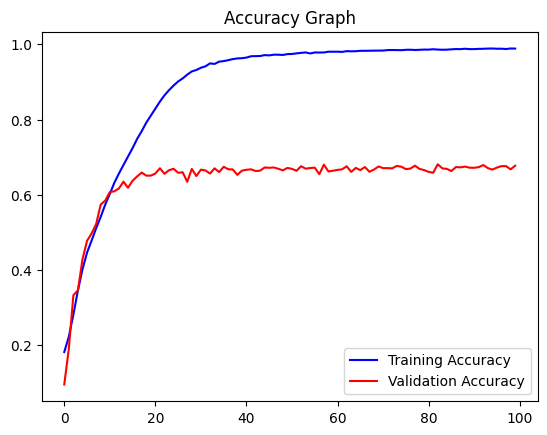

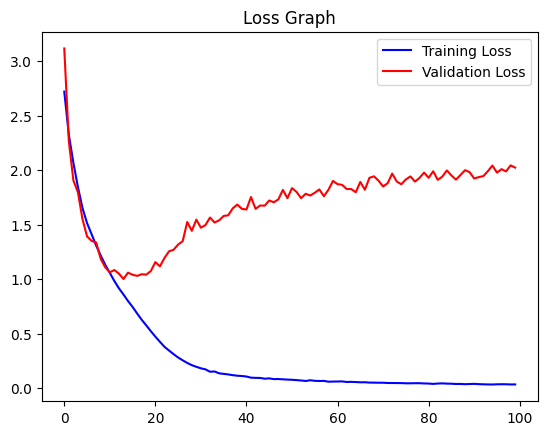

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.savefig(f'plots/AccuracyGraph_{model.name}_{DATASET}.png', bbox_inches='tight')
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.savefig(f'plots/LossGraph_{model.name}_{DATASET}.png', bbox_inches='tight')

## Accuracy, F1, Precision, Recall

In [91]:
x_test = []
y_test = []

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    x_test.extend(x_batch)
    y_test.extend(np.argmax(y_batch, axis=1))

x_test = np.array(x_test)
y_test = np.array(y_test)

y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step


In [92]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

       angry       0.61      0.54      0.57       454
     disgust       0.72      0.68      0.70        56
        fear       0.55      0.43      0.49       465
       happy       0.87      0.84      0.85       852
     neutral       0.56      0.73      0.63       563
         sad       0.57      0.56      0.57       642
    surprise       0.75      0.82      0.78       388

    accuracy                           0.67      3420
   macro avg       0.66      0.66      0.66      3420
weighted avg       0.67      0.67      0.67      3420



In [93]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

0.6681286549707602


## Confusion matrix

<Figure size 640x480 with 0 Axes>

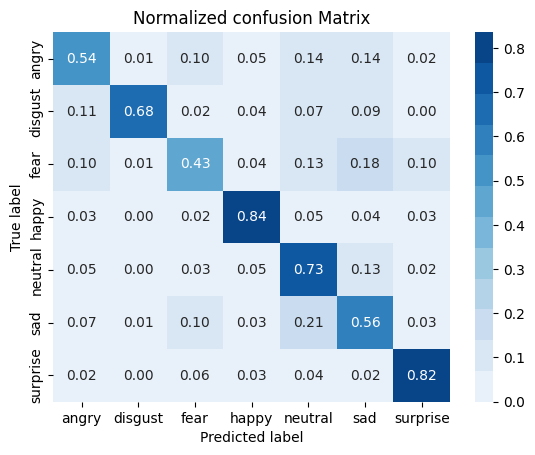

<Figure size 640x480 with 0 Axes>

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred),
    normalize='true'
)

sns.heatmap(
    cm,
    annot=True,
    xticklabels=labels,
    yticklabels=labels,
    cmap=sns.color_palette('Blues', 12),
    fmt='.2f'
)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Normalized confusion Matrix')
plt.savefig(f'plots/ConfusionMatrix_{model.name}_{DATASET}.png', bbox_inches='tight')
plt.figure()